In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
#import IPython.display
#import librosa.display
#!pip install librosa
#!pip install llvmlite

In [2]:
#conda install -c conda-forge librosa
import numpy as np
import librosa
import tensorflow as tf

C:\Users\Jaesung\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
import os
os.getcwd()
os.chdir('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS')

In [4]:
import glob
uav_path = 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS/*.wav'
none_path = 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_02_BACKGROUND/background_0*.wav'
uav_files = glob.glob(uav_path)
none_files = glob.glob(none_path)
print(uav_files)
print(none_files)

['C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\P1_stationary.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\P1_up_and_down.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\purdue_P2_unloaded_up_down.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\purrdue_P2_standing.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_DOWN_UNLOADED.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_HIGH_LOADED_DOWN.wav', 'C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/JUNE_01_PHANTOMS\\WSU_P2_LOADED_BACK_AND_

In [5]:
CHUNK_SIZE = 8192
SR = 44100
N_MFCC = 13

In [6]:
def load(files, sr=44100):
    [raw, sr] = librosa.load(files[0], sr=sr)
    for f in files[1:]:
        [array, sr] = librosa.load(f, sr=sr)
        raw = np.hstack((raw, array))
    print(raw.shape)
    return raw

In [7]:
uav_raw = load(uav_files)
none_raw = load(none_files)

(9732096,)
(18579456,)


### mfcc incremental

In [8]:
def mfcc(raw, chunk_size=8192, sr=44100, n_mfcc=13):
    mfcc = np.empty((13, 0))
    for i in range(0, len(raw), chunk_size):
        mfcc_slice = librosa.feature.mfcc(raw[i:i+chunk_size], sr=sr, n_mfcc=n_mfcc)
        mfcc = np.hstack((mfcc, mfcc_slice))
    return mfcc

In [9]:
mfcc_uav = mfcc(uav_raw)
mfcc_none = mfcc(none_raw)

In [10]:
print(mfcc_uav.shape)
print(mfcc_none.shape)

(13, 20196)
(13, 38556)


In [11]:
# or should we give one label to one chunk?
y_uav = np.ones(mfcc_uav.shape[1], dtype=int)
y_none =np.zeros(mfcc_none.shape[1], dtype=int)

print(y_uav.shape)
print(y_none.shape)

(20196,)
(38556,)


In [12]:
X = np.hstack((mfcc_uav, mfcc_none)).T
y = np.hstack((y_uav, y_none))
print(X.shape, y.shape)

(58752, 13) (58752,)


In [13]:
n_labels = y.shape[0]
n_unique_labels = 2
y_encoded = np.zeros((n_labels, n_unique_labels))
y_encoded[np.arange(n_labels), y] = 1
print(y_encoded.shape)

(58752, 2)


In [14]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

#

#(44236, 13) (11060, 13)
#(44236, 2) (11060, 2)

(47001, 13) (11751, 13)
(47001, 2) (11751, 2)


In [16]:
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_train2', X_train)    
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_test2', X_test)
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_train2', y_train)
np.save('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_test2', y_test)

In [17]:
X_train = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_train2.npy')
X_test = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/X_test2.npy')
y_train = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_train2.npy')
y_test = np.load('C:/Users/Jaesung/Desktop/코딩/Python실습/K-SW-PJT/RW_AUDIO_DATA_2018_Update/RW_AUDIO_DATA_2018_Update/Xy/y_test2.npy')

# Tensorflow finally!

## Training

### Parameters
- need feedback on this!

In [146]:
n_dim = 13 #X_train.shape[1]
n_classes = 2
n_hidden_units_one = 280 
n_hidden_units_two = 300
sd = 1 / np.sqrt(n_dim)
learning_rate = 0.01

In [147]:
#수정하면서 돌려봄 
training_epochs = 100

In [169]:
X = tf.placeholder(tf.float32,[None,n_dim])
Y = tf.placeholder(tf.float32,[None,n_classes])

W_1 = tf.Variable(tf.random_normal([n_dim,n_hidden_units_one], mean = 0, stddev=sd))
b_1 = tf.Variable(tf.random_normal([n_hidden_units_one], mean = 0, stddev=sd))
h_1 = tf.nn.tanh(tf.matmul(X,W_1) + b_1)


W_2 = tf.Variable(tf.random_normal([n_hidden_units_one,n_hidden_units_two], mean = 0, stddev=sd))
b_2 = tf.Variable(tf.random_normal([n_hidden_units_two], mean = 0, stddev=sd))
h_2 = tf.nn.sigmoid(tf.matmul(h_1,W_2) + b_2)


W = tf.Variable(tf.random_normal([n_hidden_units_two,n_classes], mean = 0, stddev=sd))
b = tf.Variable(tf.random_normal([n_classes], mean = 0, stddev=sd))
y_ = tf.nn.softmax(tf.matmul(h_2,W) + b)

init = tf.global_variables_initializer()

In [183]:
#xavier init for DNN

graph = tf.Graph()
with graph.as_default():
    initializer = tf.contrib.layers.xavier_initializer()
    W_1 = tf.Variable(initializer(shape=[n_dim,n_hidden_units_one]))
    #b_1 = tf.Variable(initializer(shape=[n_hidden_units_one]))
    W_2 = tf.Variable(initializer(shape=[n_hidden_units_one,n_hidden_units_two]))
    #b_2 = tf.Variable(initializer(shape=[n_hidden_units_two]))    
    W = tf.Variable(initializer(shape=[n_hidden_units_two,n_classes]))
    #b = tf.Variable(initializer(shape=[n_classes]))

In [184]:
cost_function = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(y_), reduction_indices=[1])) 

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost_function)
#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost_function)
#optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost_function)
#optimizer = tf.train.MomentumOptimizer(learning_rate,momentum=0.9).minimize(cost_function)


correct_prediction = tf.equal(tf.argmax(y_,1), tf.argmax(Y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [185]:
print(X_train.shape, y_train.shape)

(47001, 13) (47001, 2)


In [186]:
model_path = '../models/my_test_model'
saver = tf.train.Saver()

In [187]:
cost_history = np.empty(shape=[1],dtype=float)
y_true, y_pred = None, None
init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):            
        _,cost = sess.run([optimizer,cost_function],feed_dict={X:X_train,Y:y_train})
        cost_history = np.append(cost_history,cost)
    
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: X_test})
    y_true = sess.run(tf.argmax(y_test,1))
    saver.save(sess, model_path)
    
    


In [188]:
y_pred.shape

(11751,)

In [189]:
y_true.shape

(11751,)

In [190]:
y_encoded.shape

(58752, 2)

### Below is for later when testing with pretrained model

In [191]:
with tf.Session() as sess:
    #sess.run(init)
    saver.restore(sess, model_path)
    y_pred = sess.run(tf.argmax(y_,1),feed_dict={X: X_test})
    y_true = sess.run(tf.argmax(y_test,1))

INFO:tensorflow:Restoring parameters from ../models/my_test_model


## Results
- Batch training and batch testing

In [192]:
y_true.shape

(11751,)

In [193]:
y_pred.shape

(11751,)

#### bia /  weight init with xavier

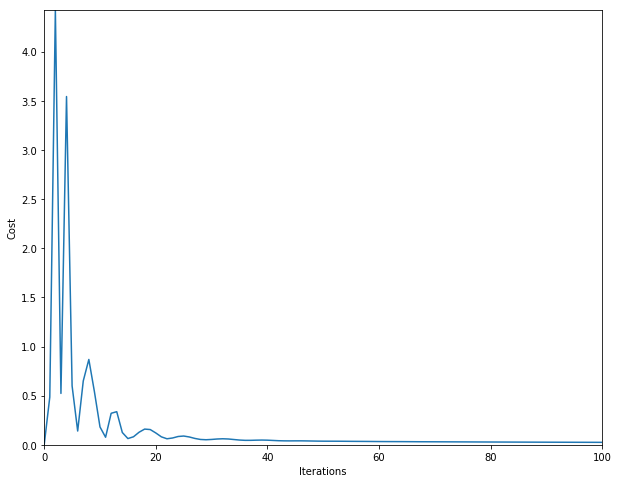

F-Score: 0.991
Accuracy:  0.9906390945451451
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7719
          1       0.98      0.99      0.99      4032

avg / total       0.99      0.99      0.99     11751

[[7649   70]
 [  40 3992]]


In [194]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### only weight init with xavier

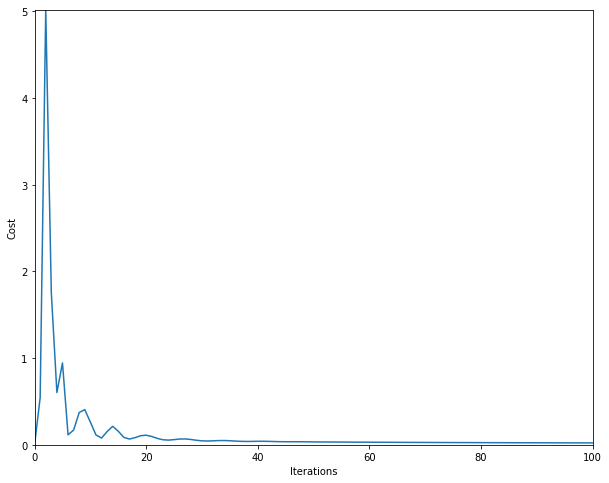

F-Score: 0.992
Accuracy:  0.9920857799336227
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7719
          1       0.99      0.99      0.99      4032

avg / total       0.99      0.99      0.99     11751

[[7668   51]
 [  42 3990]]


In [181]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100_Adam / Xavier init / Relu


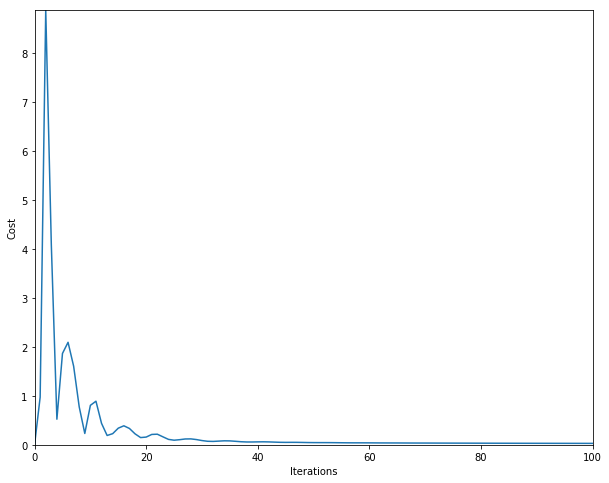

F-Score: 0.99
Accuracy:  0.9902986979831504
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7719
          1       0.98      0.99      0.99      4032

avg / total       0.99      0.99      0.99     11751

[[7652   67]
 [  47 3985]]


In [168]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100_Adam

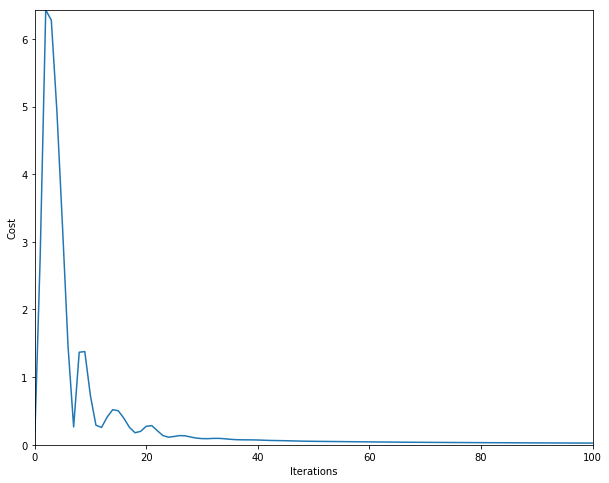

F-Score: 0.992
Accuracy:  0.992000680793124
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      7719
          1       0.99      0.99      0.99      4032

avg / total       0.99      0.99      0.99     11751

[[7663   56]
 [  38 3994]]


In [75]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100_GD

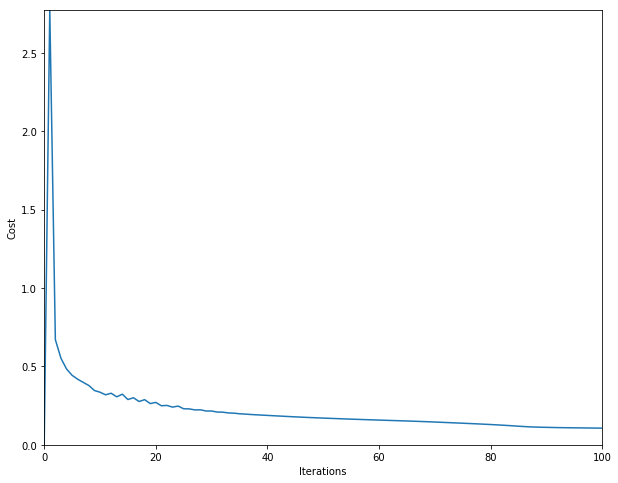

F-Score: 0.969
Accuracy:  0.9692792102799762
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      7719
          1       0.95      0.96      0.96      4032

avg / total       0.97      0.97      0.97     11751

[[7523  196]
 [ 165 3867]]


In [84]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100_NAG

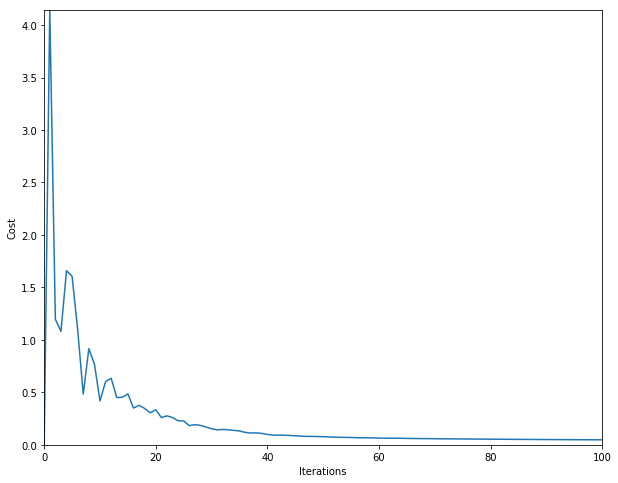

F-Score: 0.987
Accuracy:  0.9869798315037018
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      7719
          1       0.98      0.98      0.98      4032

avg / total       0.99      0.99      0.99     11751

[[7636   83]
 [  70 3962]]


In [102]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))

#### epoch=100_RMSProp

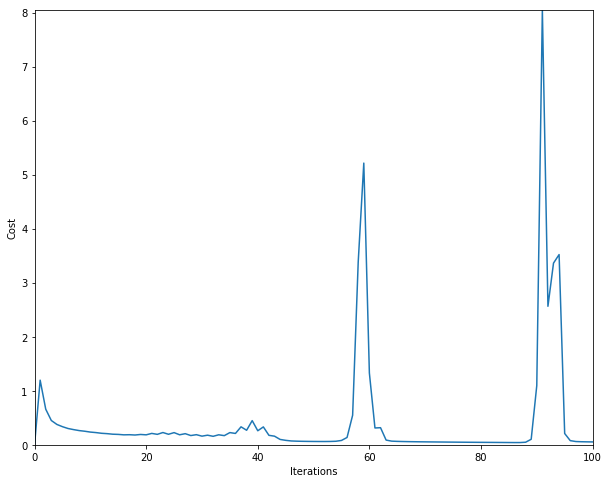

F-Score: 0.982
Accuracy:  0.9815334865117862
             precision    recall  f1-score   support

          0       0.99      0.98      0.99      7719
          1       0.97      0.98      0.97      4032

avg / total       0.98      0.98      0.98     11751

[[7586  133]
 [  84 3948]]


In [93]:
fig = plt.figure(figsize=(10,8))
plt.plot(cost_history)
plt.ylabel("Cost")
plt.xlabel("Iterations")
plt.axis([0,training_epochs,0,np.max(cost_history)])
plt.show()

import tensorflow as tf
from sklearn.metrics import precision_recall_fscore_support
p,r,f,s = precision_recall_fscore_support(y_true, y_pred, average='micro')
print("F-Score:", round(f,3))
from sklearn.metrics import accuracy_score
print("Accuracy: ", accuracy_score(y_true, y_pred))

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_true, y_pred))